Trabajo Final - Modelamiento de Datos:

En este programa busca hacer un webscrapper (con un archivo-dataset) a una pagina web, que es la pagina publicada como reto, se me ocurrio la idea de ingresar a la pagina, navegar en la misma y descargar el archivo , configurar la ruta de descarga con la de carpeta de mi proyecto,( estoy conciente que estos archivos deberan borrarse a futuro para no causar problemas de reemplazo de archivos), asi mismo te ire detallando las acciones que fui realizando como comentarios dentro del codigo, 
Saludos.. Edison

In [141]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time

driver = webdriver.Chrome('C:/PROGRAMAS PYTHON/UIDE/chromedriver_win32/chromedriver.exe')

driver.get('https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29')
time.sleep(3)
driver.get('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/')
time.sleep(3)
driver.get('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')

ruta = "C:/Users/ediso/Downloads/wdbc.data"


C:\Users\ediso\AppData\Local\Temp\ipykernel_15868\3207481174.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/PROGRAMAS PYTHON/UIDE/chromedriver_win32/chromedriver.exe')


Una vez descargado el dataset de la pagina web y extraido en la carpeta del proyecto , unicamente me toca trabajar con el mediante el empleo de la libreria de pandas y sus funciones respectivas:

<AxesSubplot:>

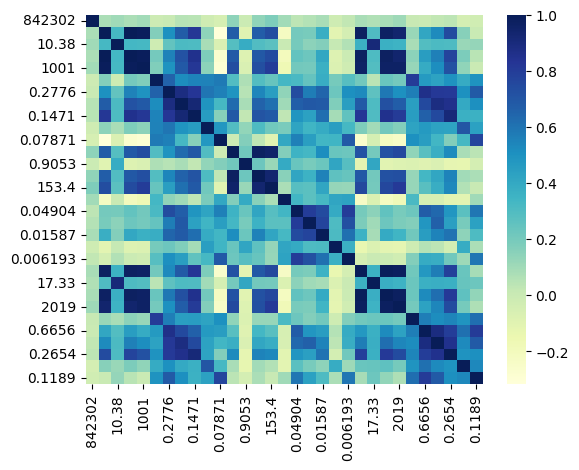

In [143]:
import re
import numpy as np
import pandas as pd
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from dtreeviz.trees import dtreeviz


#leemos el fichero .csv
df_cancer = pd.read_csv(ruta)
#visualizamos su ifnormacion para verificar una carga correcta
#df_cancer.head()
#df_cancer.info()


# Podemos ver con este mapa como se correlacionan las variables siendo los mas pscuros los que tienen relacion
sns.heatmap(df_cancer.corr(),cmap="YlGnBu")
#columns_names = df_cancer.columns.values
#print(columns_names)
######print(df_cancer.iloc[:,[0,1]])

In [144]:
#creamos y colocamos todas las funciones que utilizamos durente el proyecto, estas se incrementaran mas adelante en el proyecto y se reflejaran aqui:
def draw_tree(X, y, tree: DecisionTreeClassifier):
    viz = dtreeviz(tree, X, y,
                   target_name="Class",
                   feature_names=[str(x) for x in range(X.shape[1])],
                   class_names=list(map(str, list(set(y)))))
    return viz

def get_clf_name(clf):
    return re.sub('[^A-Za-z0-9]+', '', str(clf.__class__).split('.')[-1])

def run_experiment(X_train, y_train, X_test, y_test, clf):
    #clf = clf.copy()  #  principio Open-close de desarrollo de software (no necesario) 
    
    print(get_clf_name(clf))
    clf.fit(X_train, y_train)
    
    # training confusion matrix
    y_pred = clf.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Train: ", accuracy_score(y_train, y_pred))
    
    # test confusion matrix
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Test: ", accuracy_score(y_test, y_pred))
    return disp

    

In [145]:
#asginamos una nueva columna en relacion a la informacion a tratar , como CANCER y NO CANCER para los casos de tumores benignos y malignos respectivamente.
df_cancer['RESULTADO'] = df_cancer.iloc[:,1].apply(lambda x: "CANCER" if x=='M' else "NO-CANCER")
df_cancer.head(10)
#se genera una nueva debido a que debe ser datos numericos los uq eingresemos en nuestros modelos asignando 1 a los categorizados como cancer y 0 a todos los que no. 
df_cancer['RESULTADO2'] = df_cancer['RESULTADO'].apply(lambda x: "1" if x=='CANCER' else "0")
df_cancer.head(10)
print(df_cancer.head(10))
#print(df_cancer['Column 1'])
print(df_cancer.iloc[:,-1])
#######################################


     842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
5    844359  M  18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270   
6  84458202  M  13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366   
7    844981  M  13.00  21.82   87.50   519.8  0.12730  0.19320  0.18590   
8  84501001  M  12.46  24.04   83.97   475.9  0.11860  0.23960  0.22730   
9    845636  M  16.02  23.24  102.70   797.8  0.08206  0.06669  0.03299   

    0.1471  ...   184.6    2019  0.1622  0.6656  0.7119   0.2654  0.4601  \
0  0.07017  ...  158.80  1956.0  0.1238  0.1866  0.2416  0.18600  0.2750   
1  0.12790  ...  152.5

[Text(0.7195121951219512, 0.9375, 'X[22] <= 112.8\ngini = 0.464\nsamples = 380\nvalue = [241, 139]'),
 Text(0.5365853658536586, 0.8125, 'X[27] <= 0.151\ngini = 0.138\nsamples = 255\nvalue = [236, 19]'),
 Text(0.4146341463414634, 0.6875, 'X[23] <= 874.85\ngini = 0.072\nsamples = 240\nvalue = [231, 9]'),
 Text(0.3170731707317073, 0.5625, 'X[13] <= 91.555\ngini = 0.05\nsamples = 235\nvalue = [229, 6]'),
 Text(0.2682926829268293, 0.4375, 'X[27] <= 0.122\ngini = 0.042\nsamples = 234\nvalue = [229, 5]'),
 Text(0.0975609756097561, 0.3125, 'X[21] <= 33.35\ngini = 0.009\nsamples = 217\nvalue = [216, 1]'),
 Text(0.04878048780487805, 0.1875, 'gini = 0.0\nsamples = 204\nvalue = [204, 0]'),
 Text(0.14634146341463414, 0.1875, 'X[21] <= 33.56\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.0975609756097561, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1951219512195122, 0.0625, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.43902439024390244, 0.3125, 'X[13] <= 32.575\ngin

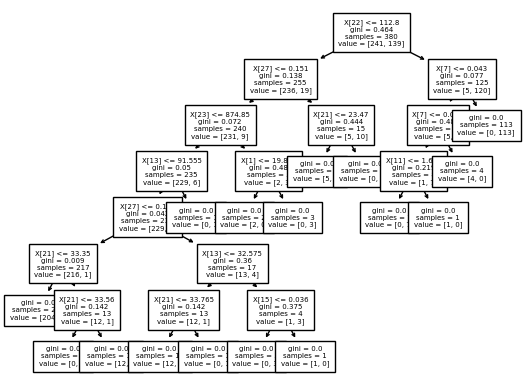

In [146]:
#mediante el empleo de Sklearn generamos el arbol de decision en base a nuestras predicciones 
from sklearn.model_selection import train_test_split
from sklearn import tree

#utilizare las columnas index , y excluire la columna 1, que contiene la informacion para determinar si es cancer o no para mi modelo
X = df_cancer.iloc[:, 2:31]
#print("SE TIENE de X:", X)
Y=df_cancer['RESULTADO2'] #utilizamos la columna adicional RESPUESTA ya que deseamos que se base en si ES CANCER O NO 

#print(X.shape)#verifico que los dimensionamientos de los array esten correctos para poder avanzar  en ambos campos
#print("Se tiene de Y:",Y.shape)
#X = X.astype(float)

X.head()
Y.head()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=42)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier() #empezamos a generar nuestro arbol de decision con toda la informacion que se ha trabajado
clf = clf.fit(X_train, y_train)
clf.get_params()

predictions = clf.predict(X_test)
predictions #obtengo el array de las predicciones para visualizar que este todo correcto
y_pred = clf.predict(X_test)
#y_true = clf.predict(X_train)
#fianlmente grafico el arbol de decision 
tree.plot_tree(clf,fontsize=5)
#from sklearn.metrics import accuracy_score
#accuracy_score()

# los resultados anteriores los podemos representar en un histograma para observar las tendencias y segun el tratamiento que hemos realizado quedarian asi:
# representados segun se puede apreciar en el siguiente histograma.
#df_cancer['RESULTADO2'].apply(len).hist(bins=3)



[[60 56]
 [ 0 72]]


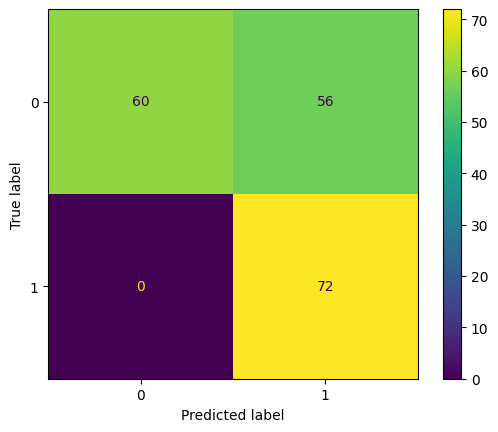

In [147]:
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
#X_train.append(clf.score(X_test, y_test))
predictions=clf.predict(X_test)
#print(predictions)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()



In [148]:
pca = PCA(n_components=6)
pca.fit(X_train)
X_train_latent = pca.transform(X_train)
X_train_latent.shape
X_train_latent.transpose()[0]
print("train shape:", X_train.shape)
print("test shape:",y_train.shape)
y_train.value_counts()

X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

train shape: (380, 29)
test shape: (380,)


In [149]:
linear_clf = SGDClassifier(max_iter=1000, tol=1e-3)
knn_clf = KNeighborsClassifier (n_neighbors=1)
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(max_depth=3)
clf = linear_clf

RandomForestClassifier
Accuracy Train:  0.9578947368421052
Accuracy Test:  0.898936170212766


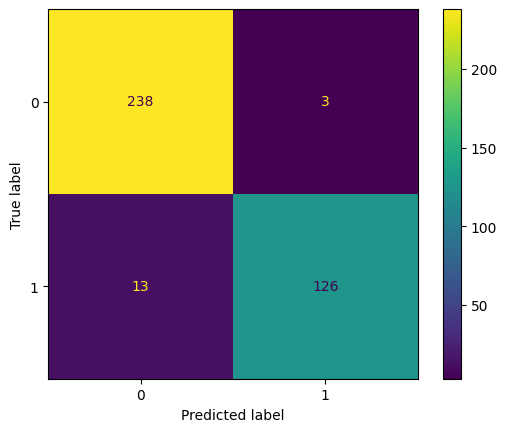

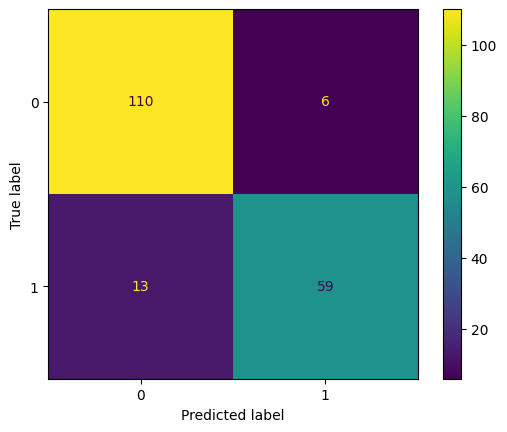

In [150]:
run_experiment(pca.transform(X_train), y_train, pca.transform(X_test), y_test, RandomForestClassifier(max_depth=3))


DecisionTreeClassifier
Accuracy Train:  0.9763157894736842
Accuracy Test:  0.9202127659574468


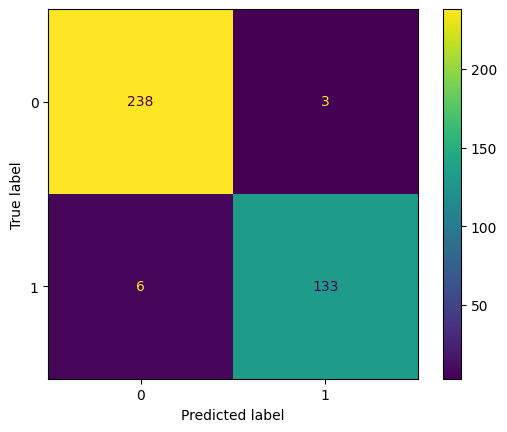

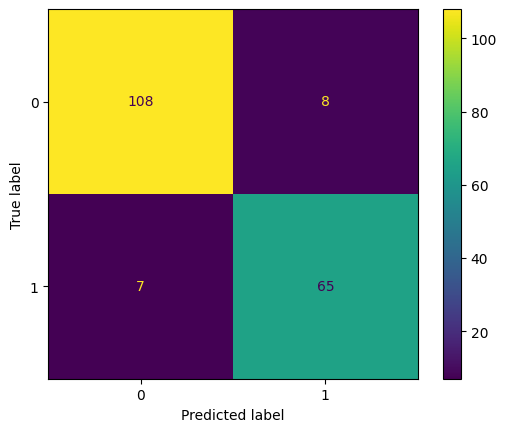

In [151]:
run_experiment(X_train, y_train, X_test, y_test, DecisionTreeClassifier(max_depth=3))

SGDClassifier
Accuracy Train:  0.9131578947368421
Accuracy Test:  0.9308510638297872


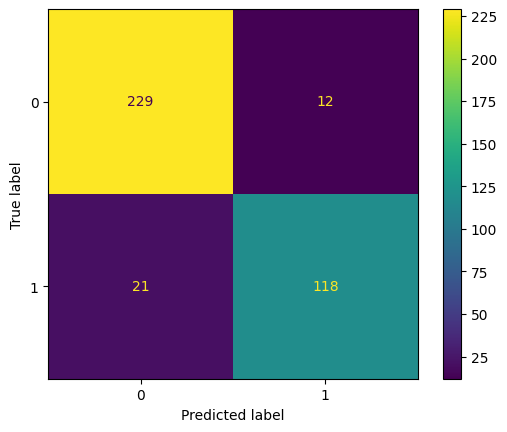

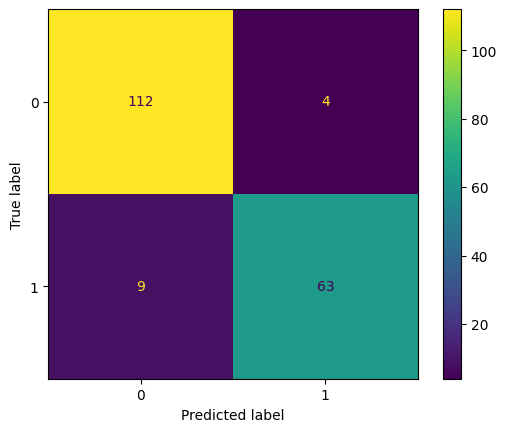

In [152]:
run_experiment(X_train, y_train, X_test, y_test, linear_clf)

De los modelos evaluados, estan el modelo lineal SGDC, el modelo KNN, el modelo de arbol de decision y el algoritmo de modelo Random Forest, en cada unos delllos mediante el analisis
de su matriz de confusion tanto en test como en train se busca una mayor precision y exactitud.
RESULTADOS de los principales modelos:
Modelo SGDC: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable, el problema es que de acuerdo a la simulaciones, algunas veces se tiene resultados muy buenos ,
y en otras resultados muy deficientes, y en este caso se ha dejado la constancia de ello en la cual alrededor del 50% de la muestra es incorrectamente categorizada.

Modelo Random Forest:Este El modelo de Machine Learning escogido,logra clasificar la clase correctamente sin embargo incluye cierto numero de muestras de la otra clase, no son grandes errores
se aprecia un modelo bastante aceptable pero que no da la certeza de ser nuestro modelos final.

*Modelo de Arbol de decision:El modelo de Machine Learning escogido detecta bien la clase,  funciona de mejor manera que el modelo Random Forest que presenta resultados similares, pero al tener mayor precision tanto en trai
como en test , con una diferencia de 97%/92% vs 95%/89 tanto en train como en test respectivamente, 
por esta razon se considera la utilizacion del modelo de arboles de decision como el que nos presenta resultados segun el planteamiento que hemos realizado.

**Como detalle adicional segun los resultados obtenidos cuando se implementan ambos modelos que nos dieron resultados aceptables, ambos algoritmos están 
expuestos al sobreajuste, lo que crea una situación de incertidumbre y tiempos altos mientras se entrenan los datos. 
En tales escenarios, un árbol de decisión tiene más posibilidades de sobreajuste. En cambio, el algoritmo random forest puede reducir esta exposición 
con múltiples árboles y si se cuenta con una maquina con buen procesamiento se puede crear modelos mas avanzados y emplear Random Forest.